In [1]:
import sys, os, inspect
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from dataset.Dataset import Dataset
from sklearn.metrics import accuracy_score
import torch
from kan.KAN import KAN
from kan.DropKAN import DropKAN
from kan.DropKANLayer import DropKANLayer
import torch
import torch.nn as nn
import numpy as np
import random
import pandas as pd 

def set_training_mode(module, mode):
    """Set the training mode for a module and all its sub-modules."""
    module.training = mode
    for submodule in module.children():
        #print(submodule)
        set_training_mode(submodule, mode)

In [221]:
work_dir = 'uci datasets/Shuffled/'
log_folder =  'log fun sig test\\'

header=None
file_name, sep, label = 'german.data-numeric', ',', -1
file_name, sep, label = 'abalone.data', ',', -1
#file_name, sep, label = 'dermatology.data', ',', -1
#file_name, sep, label = 'car.data', ',', -1
file_name, sep, label = 'adult.data', ',', -1
file_name, sep, label = 'census-income.data', ',', -1
#file_name, sep, label = 'diabetic_data.csv', ',', -1
#file_name, sep, label, header = 'bank-full.csv', ',', -1, 0
#file_name, sep, label = 'connect-4.data', ',', -1
#file_name, sep, label = 'semeion.data', ',', -1

 




data = Dataset(work_dir+file_name, sep, label, divide_dataset=False, header=header)

In [217]:
classifier = RandomForestClassifier(n_estimators=111, random_state=0, n_jobs=-1)
data.divide_dataset(classifier,
                                      normalize=True, 
                                      shuffle=False, 
                                      all_features=True, 
                                      all_instances=True, 
                                      evaluate=True, 
                                      partial_sample=False,
                                      metric=accuracy_score)

In [191]:
data.get_validation_accuracy()

0.9863013698630136

In [192]:
data.get_test_accuracy()

0.9864864864864865

In [187]:
dataset = {}
dataset['train_input'] = torch.from_numpy(data.X_train).float()
dataset['test_input'] = torch.from_numpy(data.X_test).float()
dataset['val_input'] = torch.from_numpy(data.X_val).float()
dataset['train_label'] = torch.from_numpy(data.y_train[:, None])
dataset['test_label'] = torch.from_numpy(data.y_test[:, None])
dataset['val_label'] = torch.from_numpy(data.y_val[:, None])

In [188]:
from scipy.stats import ranksums

# Log file name
log_file =  log_folder+file_name+'_log.xlsx'

# DataFrame to store logs
#log_df = pd.DataFrame(columns=['neuron_func1', 'neuron_func2', 'drop_rate1', 'drop_rate2', 'drop_mode', 'scale', 'validation_accuracy', 'test_accuracy'])



log_df = pd.read_excel(log_file)

drop_rate1 = 0
drop_rate2 = 0
drop_mode = None
drop_scale = None

best = 0
for _ in range(1):  # Number of random configurations to test
    random.seed()
    for setting in [['sum', 'ln'], ['sum', 'ls']]:
    #for setting in [['nt2', 'nt2']]:
        for j in range(20):
        
            
            model = DropKAN(seed=j,width=[data.X_train.shape[1], 10,1], grid=3, k=3, bias_trainable=True, sp_trainable=True, sb_trainable=True,
                            symbolic_enabled=False, drop_rate=[drop_rate1, drop_rate2], drop_mode=drop_mode, drop_scale=drop_scale, 
                            neuron_fun=[setting[0],setting[0]], input_preprocessing=setting[1])

            results = model.train(dataset, opt="Adam", steps=2000, log=100, batch=32, lr=0.01, update_grid=False)
            set_training_mode(model, False)
            
            val_acc = torch.mean((torch.round(model(dataset['val_input'])[:,0]) == dataset['val_label'][:,0]).float())
            test_acc = torch.mean((torch.round(model(dataset['test_input'])[:,0]) == dataset['test_label'][:,0]).float())
            
            
                
            new_row = [setting[1]+setting[0], setting[1]+setting[0],drop_rate1,drop_rate2,drop_mode,drop_scale,val_acc.item(),test_acc.item()]
            
            log_df.loc[len(log_df)] = new_row
        
            # Save the DataFrame to an Excel file
            log_df.to_excel(log_file, index=False)
            print(val_acc, test_acc)
            print(len(log_df))
            print()

print(f"Log saved to {log_file}")

description: 100%|█████████████████████████████████████████████| 2000/2000 [00:15<00:00, 126.83it/s]


tensor(0.8630) tensor(0.9054)
161



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:15<00:00, 126.66it/s]


tensor(0.9041) tensor(0.8919)
162



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:15<00:00, 126.14it/s]


tensor(0.9041) tensor(0.8784)
163



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:15<00:00, 127.83it/s]


tensor(0.9315) tensor(0.8784)
164



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:15<00:00, 127.70it/s]


tensor(0.8767) tensor(0.9054)
165



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:15<00:00, 127.73it/s]


tensor(0.8904) tensor(0.8514)
166



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:15<00:00, 125.32it/s]


tensor(0.9589) tensor(0.9054)
167



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:15<00:00, 126.64it/s]


tensor(0.8356) tensor(0.9189)
168



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:15<00:00, 127.41it/s]


tensor(0.9589) tensor(0.9324)
169



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:15<00:00, 127.61it/s]


tensor(0.9041) tensor(0.9324)
170



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:15<00:00, 125.51it/s]


tensor(0.8767) tensor(0.8514)
171



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:15<00:00, 125.64it/s]


tensor(0.8630) tensor(0.8784)
172



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:15<00:00, 125.94it/s]


tensor(0.8493) tensor(0.9459)
173



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:15<00:00, 125.97it/s]


tensor(0.9041) tensor(0.9054)
174



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:15<00:00, 125.03it/s]


tensor(0.8904) tensor(0.8784)
175



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:15<00:00, 125.83it/s]


tensor(0.9041) tensor(0.9324)
176



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:15<00:00, 125.41it/s]


tensor(0.9041) tensor(0.8784)
177



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:15<00:00, 125.65it/s]


tensor(0.8904) tensor(0.8514)
178



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:16<00:00, 124.44it/s]


tensor(0.8904) tensor(0.8919)
179



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:15<00:00, 125.23it/s]


tensor(0.8904) tensor(0.8784)
180



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:16<00:00, 120.00it/s]


tensor(0.8904) tensor(0.8919)
181



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:16<00:00, 121.54it/s]


tensor(0.9041) tensor(0.8784)
182



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:16<00:00, 124.51it/s]


tensor(0.9041) tensor(0.8919)
183



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:16<00:00, 124.28it/s]


tensor(0.8904) tensor(0.8919)
184



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:16<00:00, 124.65it/s]


tensor(0.8630) tensor(0.9189)
185



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:16<00:00, 124.76it/s]


tensor(0.8904) tensor(0.8919)
186



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:16<00:00, 124.71it/s]


tensor(0.9315) tensor(0.9189)
187



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:16<00:00, 124.61it/s]


tensor(0.8904) tensor(0.9054)
188



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:16<00:00, 124.70it/s]


tensor(0.8767) tensor(0.8919)
189



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:16<00:00, 123.05it/s]


tensor(0.9041) tensor(0.8784)
190



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:16<00:00, 124.58it/s]


tensor(0.9178) tensor(0.8919)
191



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:16<00:00, 124.68it/s]


tensor(0.8904) tensor(0.9054)
192



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:16<00:00, 124.48it/s]


tensor(0.9041) tensor(0.8649)
193



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:16<00:00, 124.72it/s]


tensor(0.8904) tensor(0.8919)
194



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:16<00:00, 123.97it/s]


tensor(0.9178) tensor(0.9054)
195



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:16<00:00, 123.85it/s]


tensor(0.9041) tensor(0.8919)
196



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:16<00:00, 122.18it/s]


tensor(0.8767) tensor(0.8649)
197



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:16<00:00, 123.76it/s]


tensor(0.8904) tensor(0.8514)
198



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:16<00:00, 124.49it/s]


tensor(0.9178) tensor(0.8649)
199



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:16<00:00, 124.13it/s]


tensor(0.9041) tensor(0.8784)
200

Log saved to log fun sig test\dermatology.data_log.xlsx


In [222]:
from scipy import stats

log_df =  pd.read_excel(log_folder+file_name+'_log.xlsx')
log_file =  log_folder+file_name+'_log.xlsx'

# Create a DataFrame to store significance results
unique_combinations = log_df[['neuron_func1', 'neuron_func2']].drop_duplicates().values

significance_results = pd.DataFrame(columns=['comb1', 'comb2', 'p_value', 'significant', 'accuracies1', 'accuracies2', 'std1', 'std2'])


valid_combinations = [['sumln', 'sum'], ['mean', 'mean'], ['sum', 'sum']]

# Compare each pair of combinations
for i in range(len(unique_combinations)):
    for j in range(i + 1, len(unique_combinations)):
        comb1 = unique_combinations[i]
        comb2 = unique_combinations[j]


        if list(comb1) in valid_combinations and list(comb2) in valid_combinations:
        
            # Get the test accuracies for the two combinations
            accuracies1 = log_df[(log_df['neuron_func1'] == comb1[0]) &
                                 (log_df['neuron_func2'] == comb1[1])]['test_accuracy']
    
            #print(accuracies1)
            
            accuracies2 = log_df[(log_df['neuron_func1'] == comb2[0]) &
                                 (log_df['neuron_func2'] == comb2[1])]['test_accuracy']
            
            # Perform Wilcoxon rank-sum test
            stat, p_value = ranksums(accuracies1.values, accuracies2.values)
            
            # Check if the p-value indicates a significant difference
            significant = p_value < 0.05
            
            # Append the result to the significance_results DataFrame
            significance_results.loc[len(significance_results)] = [f"{comb1[0]}_{comb1[1]}", f"{comb2[0]}_{comb2[1]}",  p_value, significant, 
                                                                   np.round(100*np.mean(accuracies1), 2), np.round(100*np.mean(accuracies2), 2), 
                                                                   np.round(100*np.std(accuracies1), 2), np.round(100*np.std(accuracies2), 2)]
           

# Print the significance results
print(significance_results)

significance_results.to_excel(log_file+'_sig.xlsx', index=False)

       comb1      comb2   p_value  significant  accuracies1  accuracies2  \
0    sum_sum  mean_mean  0.000338         True        94.79        95.04   
1    sum_sum  sumln_sum  0.007407         True        94.79        94.98   
2  mean_mean  sumln_sum  0.126431        False        95.04        94.98   

   std1  std2  
0  0.25  0.12  
1  0.25  0.12  
2  0.12  0.12  


In [10]:
# Print all trainable parameters
for name, param in model.named_parameters():
    if param.requires_grad:
        print(f"Parameter name: {name}")
        print(param.data)

Parameter name: biases.0.weight
tensor([[-0.1435,  0.1896,  0.2317, -0.3570,  0.3802, -0.1886, -0.2459, -0.0963,
          0.2261, -0.2544]])
Parameter name: biases.1.weight
tensor([[0.2996]])
Parameter name: act_fun.0.coef
tensor([[[ 1.0094e+00,  7.0103e-01, -1.3695e-01,  6.5846e-01, -1.4535e+00,
          -1.7035e+00],
         [ 6.0322e-01,  5.9816e-01,  6.4288e-01,  4.5169e-01, -6.8156e-01,
          -7.8056e-01],
         [ 3.3550e-01,  3.7750e-01,  6.7657e-01,  6.5372e-01, -3.8258e-01,
          -4.9898e-01],
         ...,
         [ 3.4208e-01,  3.9842e-01,  4.2975e-01,  9.5366e-01, -1.2454e+00,
          -1.4901e+00],
         [ 4.9219e-01,  8.4158e-01,  1.2656e+00, -8.7827e-01, -8.6864e-01,
          -7.0175e-01],
         [ 2.1992e+00,  1.4292e+00, -1.0995e+00, -1.0741e+00, -1.5813e+00,
          -1.6035e+00]],

        [[-7.0205e-01,  4.0124e-02,  1.5883e+00, -1.0589e+00, -2.5325e+00,
          -6.1919e-01],
         [-2.3788e+00, -8.0220e-01,  9.4189e-01, -1.7684e-01,  7.30

In [24]:
import torch
import torch.nn as nn

# Example 1: Normalizing over the last dimension
input_tensor1 = torch.randn(3, 4)  # Shape: (batch_size, num_features)
normalized_shape1 = (4,)
layer_norm1 = nn.BatchNorm1d(normalized_shape1)
print(input_tensor1)

output_tensor1 = layer_norm1(input_tensor1)
print("Output (Example 1):")
print(output_tensor1)


tensor([[ 1.3222,  0.3939, -0.1930, -0.0133],
        [ 1.6677, -0.5219,  0.2482, -2.0191],
        [-0.5873, -0.0695, -0.4062,  2.4795]])
Output (Example 1):
tensor([[ 0.5257,  1.2296, -0.2788, -0.0882],
        [ 0.8741, -1.2197,  1.3400, -1.1783],
        [-1.3998, -0.0098, -1.0612,  1.2665]],
       grad_fn=<NativeBatchNormBackward0>)


In [27]:
m = torch.mean(input_tensor1)

In [29]:
s = torch.std(input_tensor1)

In [30]:
(input_tensor1-m)/s

tensor([[ 0.9568,  0.1711, -0.3257, -0.1736],
        [ 1.2492, -0.6040,  0.0478, -1.8713],
        [-0.6594, -0.2211, -0.5061,  1.9364]])

In [31]:
m

tensor(0.1918)

In [59]:
import torch
import torch.nn as nn

class NormalizeBetweenMinusNAndN(nn.Module):
    def __init__(self, n=1):
        super(NormalizeBetweenMinusNAndN, self).__init__()
        self.n = n

    def forward(self, x):
        min_val = x.min(dim=0, keepdim=True)[0]
        max_val = x.max(dim=0, keepdim=True)[0]
        x = (2 * self.n * (x - min_val) / (max_val - min_val)) - self.n
        return x

# Example usage
x = torch.tensor([[1.0, 2.0, 2.0, 3.0], [2.0, 4.0, 6.0, 8.0]])
layer = NormalizeBetweenMinusNAndN(n=1)  # Set the desired range to [-2, 2]
normalized_x = layer(x)
print(normalized_x)


tensor([[-1., -1., -1., -1.],
        [ 1.,  1.,  1.,  1.]])


In [25]:
for submodule in model.children():
        print(submodule)

ModuleList(
  (0): Linear(in_features=10, out_features=1, bias=False)
  (1): Linear(in_features=1, out_features=1, bias=False)
)
ModuleList(
  (0-1): 2 x DropKANLayer(
    (base_fun): SiLU()
  )
)
ModuleList(
  (0): BatchNormKAN()
)
SiLU()
ModuleList(
  (0-1): 2 x Symbolic_KANLayer()
)


In [12]:
model.act_fun[1].neuron_fun

'sum'

In [14]:
import torch

# Example 1D tensor
tensor = torch.tensor([0.5, -0.7, 1.2, -1.5, 0.9, -0.2, 2.0, -0.8])

# Count the number of elements between -1 and 1 (inclusive)
count = ((tensor >= -1) & (tensor <= 1)).sum().item()

print(f"Number of elements between -1 and 1: {count}")


Number of elements between -1 and 1: 5


In [16]:
tensor.shape[0]

8

In [79]:
from scipy.stats import ranksums

# Log file name
log_file =  log_folder+'output_analysis.xlsx'

# DataFrame to store logs
#log_df = pd.DataFrame(columns=['dataset', 'neuron function', 'neuron outputs within range'])




drop_rate1 = 0
drop_rate2 = 0
drop_mode = None
drop_scale = None

best = 0
for _ in range(1):  # Number of random configurations to test
    random.seed()
    for setting in [['sumln', 'sum'], ['sumlnkan', 'sum'], ['mean', 'sum'], ['sum', 'sum']]:
    #for setting in [['nt2', 'nt2']]:
        for j in range(1):
        
            
            model = DropKAN(seed=j,width=[data.X_train.shape[1], 10,1], grid=3, k=3, bias_trainable=True, sp_trainable=True, sb_trainable=True,
                            symbolic_enabled=False, drop_rate=[drop_rate1, drop_rate2], drop_mode=drop_mode, drop_scale=drop_scale, 
                            neuron_fun=[setting[0],setting[1]])

            results = model.train(dataset, opt="Adam", steps=100, log=100, batch=32, lr=0.01, update_grid=False)
            set_training_mode(model, False)
            
            #val_acc = torch.mean((torch.round(model(dataset['val_input'])[:,0]) == dataset['val_label'][:,0]).float())
            #test_acc = torch.mean((torch.round(model(dataset['test_input'])[:,0]) == dataset['test_label'][:,0]).float())
            
            
                
            
            
            print(np.round(100*model.act_fun[0].count/model.act_fun[0].total), 2)
            print(model.act_fun[0].count)
            print()
            new_row = [file_name, setting[0], 100*model.act_fun[0].count/model.act_fun[0].total]
            
            log_df.loc[len(log_df)] = new_row
        
            # Save the DataFrame to an Excel file
            log_df.to_excel(log_file, index=False)
           

print(f"Log saved to {log_file}")


description: 100%|███████████████████████████████████████████████| 100/100 [00:00<00:00, 145.63it/s]


64.0 2
20333



description: 100%|███████████████████████████████████████████████| 100/100 [00:00<00:00, 142.93it/s]


100.0 2
32000



description: 100%|███████████████████████████████████████████████| 100/100 [00:00<00:00, 176.84it/s]


100.0 2
32000



description: 100%|███████████████████████████████████████████████| 100/100 [00:00<00:00, 176.84it/s]

30.0 2
9705

Log saved to log fun sig test\output_analysis.xlsx


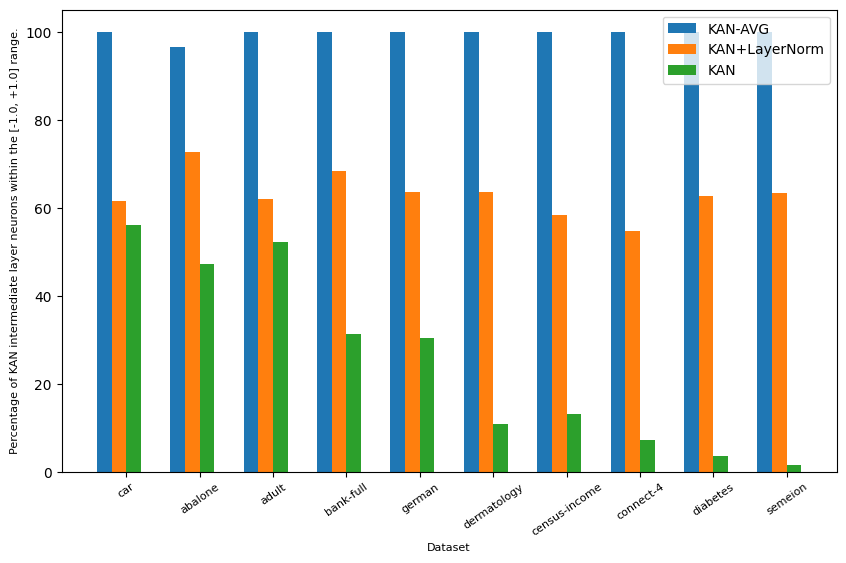

In [115]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel(log_folder+'output_analysis.xlsx')

df = pd.DataFrame(df[df['neuron function'] != 'kan+lnkan'])

custom_order = ['semeion', 'diabetes', 'connect-4', 'census-income', 'dermatology', 'german', 'bank-full', 'adult', 'abalone', 'car']
custom_order = custom_order[::-1]

df['dataset'] = pd.Categorical(df['dataset'], categories=custom_order, ordered=True)
df = df.sort_values('dataset')

# Create a bar chart
def plot_bar_chart(df):
    datasets = df['dataset'].unique()
    neuron_functions = df['neuron function'].unique()
    num_functions = len(neuron_functions)

    # Set up the figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Set bar width and positions
    bar_width = 0.8 / num_functions
    bar_positions = np.arange(len(datasets))

    # Plot each dataset
    for i, function in enumerate(['KAN-AVG', 'KAN+LayerNorm', 'KAN']):
        subset = df[df['neuron function'] == function]
        outputs_within_range = subset['neuron outputs within range'].values
        ax.bar(bar_positions + i * bar_width, outputs_within_range, width=bar_width, label=function)

    # Set labels and title
    ax.set_xlabel('Dataset', fontsize=8)
    ax.set_ylabel('Percentage of KAN intermediate layer neurons within the [-1.0, +1.0] range.', fontsize=8)
    #ax.set_title('Neuron Outputs Within Range by Neuron Function and Dataset')
    ax.set_xticks(bar_positions + bar_width * (num_functions - 1) / 2)
    ax.set_xticklabels(datasets, fontsize=8)

    # Add legend
    ax.legend()
    plt.xticks(rotation=35)

    # Show the plot
    plt.savefig('neuron_analysis.pdf')
    plt.show()

plot_bar_chart(df)


In [50]:
import torch
import torch.nn as nn

class NormalizeToCustomRange(nn.Module):
    def __init__(self, n=1, eps=1e-5):
        super(NormalizeToCustomRange, self).__init__()
        self.n = n
        self.eps = eps

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        std = x.std(dim=-1, keepdim=True) + self.eps
        normalized_x = (x - mean) / std
        scaled_x = normalized_x * (self.n / torch.max(torch.abs(normalized_x)))
        return scaled_x

# Example usage
x = torch.tensor([[3.0, 5.0, 8.0, 10.0], [2.0, 4.0, 6.0, 8.0]], dtype=torch.float32)
layer = NormalizeToCustomRange(n=2)  # Set the desired range to [-2, 2]
normalized_x = layer(x)
print(normalized_x)


tensor([[-1.9377, -0.8305,  0.8305,  1.9377],
        [-2.0000, -0.6667,  0.6667,  2.0000]])
